In [14]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '231114_0033_4kPa_5V_2line_Data'
dataname = data+'_B9'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:28]
SensorData1 = SD1
SD1.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r
count,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,...,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000
mean,42.855263,43.416334,49.704300,44.089214,48.230228,60.462222,55.373545,46.998844,58.673569,54.800426,...,44.589455,52.552931,51.135987,52.070160,51.070722,42.798061,35.631907,77.999161,169.978138,2.799629
std,1.720371,2.301961,1.639777,2.036360,1.927641,2.969197,2.430842,2.347178,2.093541,1.783236,...,2.664938,3.248250,2.689029,2.097507,1.986860,2.118409,25.086784,46.123852,103.781203,1.833102
min,32.230000,33.300000,39.450000,33.540000,36.060000,38.630000,40.970000,31.630000,44.730000,38.370000,...,35.720000,43.980000,40.640000,37.530000,37.810000,32.090000,-543.730000,2.000000,0.000000,0.000000
25%,41.760000,42.000000,48.710000,42.840000,47.160000,59.292500,54.320000,45.600000,57.530000,53.960000,...,43.060000,50.620000,49.510000,50.960000,49.880000,41.490000,14.760000,42.000000,80.000000,0.800000
50%,42.760000,43.210000,49.790000,44.050000,48.440000,61.250000,55.550000,46.740000,58.460000,54.930000,...,44.210000,51.930000,50.780000,52.110000,51.080000,42.750000,34.200000,82.000000,160.000000,2.400000
75%,43.830000,44.470000,50.750000,45.230000,49.470000,62.290000,56.780000,47.980000,59.450000,55.840000,...,45.430000,53.410000,52.190000,53.220000,52.280000,44.020000,57.707500,114.000000,260.000000,4.000000
max,51.400000,56.090000,60.670000,53.710000,58.510000,67.030000,67.930000,59.380000,73.460000,64.280000,...,60.920000,67.660000,66.910000,63.480000,60.630000,52.990000,98.310000,154.000000,340.000000,5.600000


In [15]:
SDreal = SD1
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r
count,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,...,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000,114354.000000
mean,42.855263,43.416334,49.704300,44.089214,48.230228,60.462222,55.373545,46.998844,58.673569,54.800426,...,44.589455,52.552931,51.135987,52.070160,51.070722,42.798061,35.631907,77.999161,169.978138,2.799629
std,1.720371,2.301961,1.639777,2.036360,1.927641,2.969197,2.430842,2.347178,2.093541,1.783236,...,2.664938,3.248250,2.689029,2.097507,1.986860,2.118409,25.086784,46.123852,103.781203,1.833102
min,32.230000,33.300000,39.450000,33.540000,36.060000,38.630000,40.970000,31.630000,44.730000,38.370000,...,35.720000,43.980000,40.640000,37.530000,37.810000,32.090000,-543.730000,2.000000,0.000000,0.000000
25%,41.760000,42.000000,48.710000,42.840000,47.160000,59.292500,54.320000,45.600000,57.530000,53.960000,...,43.060000,50.620000,49.510000,50.960000,49.880000,41.490000,14.760000,42.000000,80.000000,0.800000
50%,42.760000,43.210000,49.790000,44.050000,48.440000,61.250000,55.550000,46.740000,58.460000,54.930000,...,44.210000,51.930000,50.780000,52.110000,51.080000,42.750000,34.200000,82.000000,160.000000,2.400000
75%,43.830000,44.470000,50.750000,45.230000,49.470000,62.290000,56.780000,47.980000,59.450000,55.840000,...,45.430000,53.410000,52.190000,53.220000,52.280000,44.020000,57.707500,114.000000,260.000000,4.000000
max,51.400000,56.090000,60.670000,53.710000,58.510000,67.030000,67.930000,59.380000,73.460000,64.280000,...,60.920000,67.660000,66.910000,63.480000,60.630000,52.990000,98.310000,154.000000,340.000000,5.600000


In [16]:
# SDreal 값이 999이거나 100이상인 이상치 제거
SDreal = SDreal[~(SDreal == 999).any(axis=1)]
SDreal = SDreal[~(SDreal == 255).any(axis=1)]
SDreal = SDreal[~(SDreal == 4).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

# 'Force', 'theta', 'z', 'r' 열을 제외한 열에서 100 이상의 값을 제거
cols_to_exclude = ["Force", "theta", "z", "r"]
cols_to_check = [col for col in SDreal.columns if col not in cols_to_exclude]

SDreal = SDreal[~((SDreal < 0) & (SDreal.columns == "Force")).any(axis=1)]
SDreal = SDreal[~((SDreal >= 10000) & (SDreal.columns == "Force")).any(axis=1)]


#SDreal = SDreal[SDreal["r"] >= 0.8*1]
SDreal = SDreal[SDreal["z"] <= 160]
SDreal = SDreal[SDreal["z"] >= 0]

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r,cos,sin
count,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.00000,99820.000000,...,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,9.982000e+04
mean,42.836636,43.379291,49.691405,44.073934,48.220744,60.486009,55.370593,46.970769,58.65665,54.796995,...,51.100864,52.059837,51.055972,42.763964,32.493168,77.880264,169.777600,2.630463,0.000128,1.372103e-03
std,1.710411,2.271953,1.627334,2.013317,1.882738,2.899138,2.391400,2.317261,2.04911,1.747111,...,2.650983,2.060209,1.955305,2.078023,23.347603,46.037847,103.771275,1.899721,0.707279,7.069407e-01
min,32.230000,33.300000,39.590000,33.540000,36.060000,38.630000,40.970000,31.630000,45.09000,38.550000,...,40.640000,37.530000,38.690000,32.090000,0.000000,2.000000,0.000000,0.000000,-1.000000,-9.848078e-01
25%,41.740000,41.980000,48.700000,42.830000,47.160000,59.330000,54.320000,45.590000,57.53000,53.950000,...,49.490000,50.950000,49.870000,41.470000,13.660000,34.000000,80.000000,0.800000,-0.766044,-6.427876e-01
50%,42.740000,43.180000,49.780000,44.040000,48.420000,61.240000,55.550000,46.720000,58.45000,54.920000,...,50.760000,52.100000,51.070000,42.730000,30.270000,74.000000,160.000000,2.400000,-0.173648,1.224647e-16
75%,43.810000,44.420000,50.740000,45.210000,49.440000,62.270000,56.760000,47.950000,59.43000,55.830000,...,52.150000,53.210000,52.260000,43.990000,52.530000,114.000000,260.000000,4.800000,0.766044,6.427876e-01
max,51.400000,56.090000,60.670000,53.710000,57.110000,67.030000,67.930000,59.380000,73.46000,64.280000,...,66.910000,63.480000,60.630000,52.990000,93.610000,154.000000,340.000000,5.600000,1.000000,9.848078e-01


In [18]:
# 24개의 특성에 대한 평균과 표준편차를 계산합니다.
mean_values = SDreal.iloc[:, :24].mean().values
std_values = SDreal.iloc[:, :24].std().values

mean_values = [round(value, 2) for value in mean_values]
std_values = [round(value, 2) for value in std_values]

print("float Xmean[24] = {", ", ".join(map(str, mean_values)), "};")
print("float Xstd[24] = {", ", ".join(map(str, std_values)), "}")



min_max_25 = [round(SDreal.iloc[:, 24].min(), 2), round(SDreal.iloc[:, 24].max(), 2)]
min_max_26 = [round(SDreal.iloc[:, 25].min(), 2), round(SDreal.iloc[:, 25].max(), 2)]

print("float Fminmax[2] = {", ", ".join(map(str, min_max_25)), "};")

print("float Zminmax[2] = {", ", ".join(map(str, min_max_26)), "};")

float Xmean[24] = { 42.84, 43.38, 49.69, 44.07, 48.22, 60.49, 55.37, 46.97, 58.66, 54.8, 53.67, 49.57, 45.03, 47.63, 48.58, 43.53, 50.25, 48.23, 44.56, 52.52, 51.1, 52.06, 51.06, 42.76 };
float Xstd[24] = { 1.71, 2.27, 1.63, 2.01, 1.88, 2.9, 2.39, 2.32, 2.05, 1.75, 2.14, 1.73, 1.91, 1.71, 1.54, 1.49, 1.46, 3.19, 2.64, 3.22, 2.65, 2.06, 1.96, 2.08 }
float Fminmax[2]={ 0.0, 93.61 };
float Zminmax[2]={ 2.0, 154.0 };


In [20]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns

    for column in columns:
        df[column] = transformation(df[column])
    
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

def standardize(column):
    return (column - column.mean()) / column.std()

def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1



SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], submean)

#SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], submean)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], standardize)

SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r,cos,sin
count,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.00000,99820.000000,...,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,9.982000e+04
mean,42.836636,43.379291,49.691405,44.073934,48.220744,60.486009,55.370593,46.970769,58.65665,54.796995,...,51.100864,52.059837,51.055972,42.763964,-0.305776,-0.001575,169.777600,-0.060549,0.000128,1.372103e-03
std,1.710411,2.271953,1.627334,2.013317,1.882738,2.899138,2.391400,2.317261,2.04911,1.747111,...,2.650983,2.060209,1.955305,2.078023,0.498827,0.605761,103.771275,0.678472,0.707279,7.069407e-01
min,32.230000,33.300000,39.590000,33.540000,36.060000,38.630000,40.970000,31.630000,45.09000,38.550000,...,40.640000,37.530000,38.690000,32.090000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-9.848078e-01
25%,41.740000,41.980000,48.700000,42.830000,47.160000,59.330000,54.320000,45.590000,57.53000,53.950000,...,49.490000,50.950000,49.870000,41.470000,-0.708151,-0.578947,80.000000,-0.714286,-0.766044,-6.427876e-01
50%,42.740000,43.180000,49.780000,44.040000,48.420000,61.240000,55.550000,46.720000,58.45000,54.920000,...,50.760000,52.100000,51.070000,42.730000,-0.353274,-0.052632,160.000000,-0.142857,-0.173648,1.224647e-16
75%,43.810000,44.420000,50.740000,45.210000,49.440000,62.270000,56.760000,47.950000,59.43000,55.830000,...,52.150000,53.210000,52.260000,43.990000,0.122316,0.473684,260.000000,0.714286,0.766044,6.427876e-01
max,51.400000,56.090000,60.670000,53.710000,57.110000,67.030000,67.930000,59.380000,73.46000,64.280000,...,66.910000,63.480000,60.630000,52.990000,1.000000,1.000000,340.000000,1.000000,1.000000,9.848078e-01


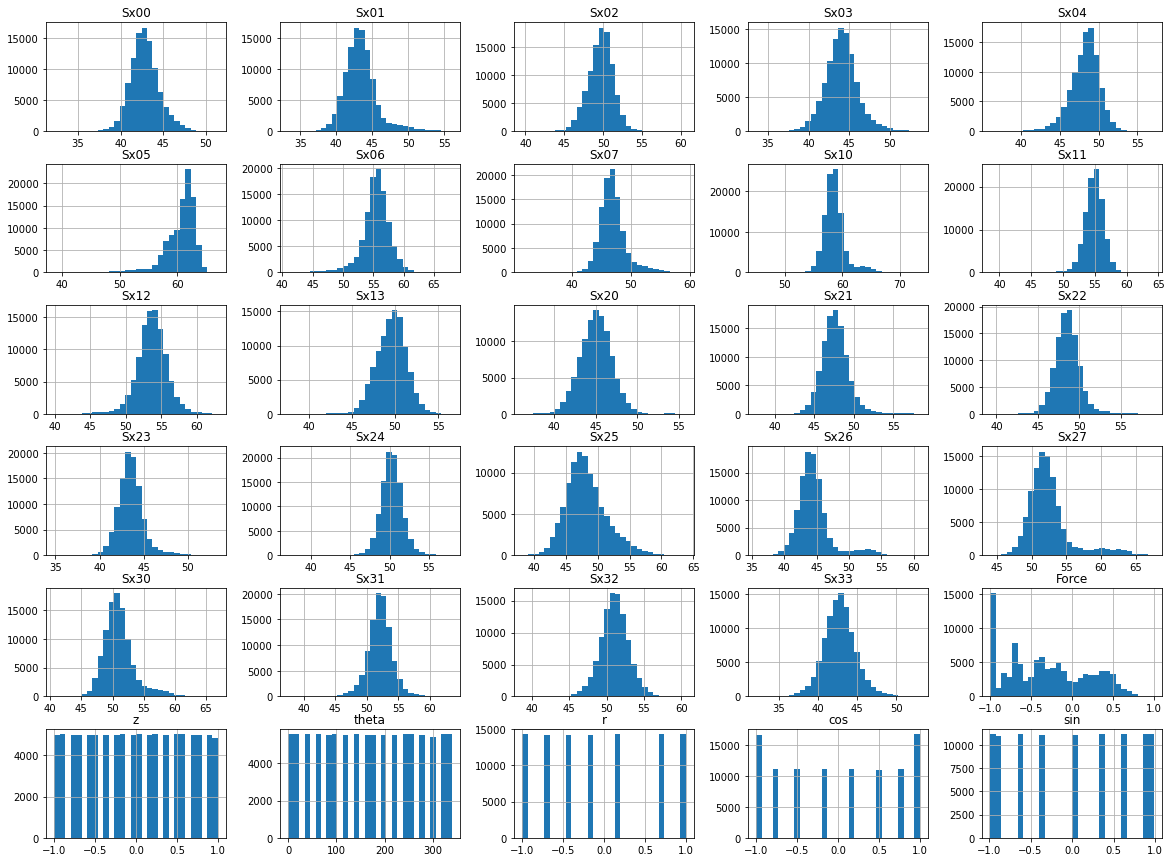

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
SDreal.hist(bins=30, figsize=(20,15))
plt.show()

In [22]:
SDy = SDreal.iloc[:,24:30]
SDy.describe()

,Force,z,theta,r,cos,sin
count,99820.000000,99820.000000,99820.000000,99820.000000,99820.000000,9.982000e+04
mean,-0.305776,-0.001575,169.777600,-0.060549,0.000128,1.372103e-03
std,0.498827,0.605761,103.771275,0.678472,0.707279,7.069407e-01
min,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-9.848078e-01
25%,-0.708151,-0.578947,80.000000,-0.714286,-0.766044,-6.427876e-01
50%,-0.353274,-0.052632,160.000000,-0.142857,-0.173648,1.224647e-16
75%,0.122316,0.473684,260.000000,0.714286,0.766044,6.427876e-01
max,1.000000,1.000000,340.000000,1.000000,1.000000,9.848078e-01


In [23]:
X = SDreal.iloc[:,0:24]
y = SDreal.iloc[:,[24,25,28,29]]

In [24]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx22,Sx23,Sx24,Sx25,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33
0,39.40,40.99,46.63,41.00,46.10,57.38,54.71,46.88,57.08,53.29,...,46.91,39.35,49.14,42.76,43.06,49.92,47.82,48.58,47.79,41.34
1,39.83,41.16,47.02,40.50,46.42,57.31,55.26,46.90,57.40,53.41,...,47.09,39.96,48.95,43.30,42.88,49.60,48.69,49.15,47.82,41.62
2,40.69,40.97,46.85,40.75,46.18,57.93,55.22,47.42,57.00,53.34,...,46.91,40.14,48.96,44.25,42.74,49.00,48.57,49.96,48.02,42.02
3,41.08,40.47,47.04,40.63,45.99,58.27,55.51,47.18,57.00,53.45,...,47.42,40.28,49.30,44.71,41.95,49.33,48.14,50.63,48.51,42.18
4,41.06,40.06,47.20,40.85,45.99,58.39,55.59,47.48,56.66,53.88,...,47.19,40.73,48.75,44.09,41.96,49.28,47.79,50.19,48.43,42.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114349,41.10,43.97,50.47,43.95,47.54,62.31,56.64,46.15,58.30,55.58,...,47.62,42.13,50.68,45.32,44.37,52.44,51.65,54.09,48.13,43.04
114350,41.25,43.81,50.39,44.46,47.11,62.26,56.20,46.13,58.58,55.15,...,47.18,41.78,50.90,44.93,44.47,52.37,51.38,53.91,48.28,43.37
114351,41.04,44.01,51.16,45.05,46.93,62.21,55.83,45.94,58.82,55.62,...,46.82,41.65,50.75,44.78,45.06,52.31,50.98,53.92,48.56,43.14
114352,41.03,43.34,51.30,44.21,46.77,62.18,55.69,45.95,58.68,55.85,...,46.85,42.04,51.29,44.15,45.05,52.42,50.48,53.44,48.30,42.45


In [25]:
y

,Force,z,cos,sin
0,-1.000000,-1.0,1.000000,0.00000
1,-1.000000,-1.0,1.000000,0.00000
2,-1.000000,-1.0,1.000000,0.00000
3,-1.000000,-1.0,1.000000,0.00000
4,-1.000000,-1.0,1.000000,0.00000
...,...,...,...,...
114349,-0.791262,1.0,0.939693,-0.34202
114350,-0.791262,1.0,0.939693,-0.34202
114351,-0.790834,1.0,0.939693,-0.34202
114352,-0.791475,1.0,0.939693,-0.34202


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)

In [27]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  59892 ea 60 %    X_valid:  19964 ea 20 %    X_test:  19964 ea 20 %


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/231114_0033_4kPa_5V_2line_Data_B9_SS.pkl']

In [30]:
from tensorflow import keras
model = keras.models.Sequential([  
    keras.layers.Dense(512, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),            
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                                                
    keras.layers.Dense(4)    
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               12800     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,780
Trainable params: 83,780
Non-trainable params: 0
_________________________________________________________________


## Callback (best, early stopping, tensorboard)

In [31]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'231006_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [32]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [33]:
dataname

'231114_0033_4kPa_5V_2line_Data_B9'

In [34]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 8
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
1872/1872 [==============================] - 4s 2ms/step - loss: 0.1504 - val_loss: 0.0971
Epoch 2/300
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0856 - val_loss: 0.0782
Epoch 3/300
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0693 - val_loss: 0.0690
Epoch 4/300
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0600 - val_loss: 0.0643
Epoch 5/300
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0538 - val_loss: 0.0648
Epoch 6/300
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0496 - val_loss: 0.0619
Epoch 7/300
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0460 - val_loss: 0.0529
Epoch 8/300
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0432 - val_loss: 0.0513
Epoch 9/300
1872/1872 [==============================] - 3s 2ms/step - loss: 0.0421 - val_loss: 0.0462
Epoch 10/300
1872/1872 [==============================] - 3s 2ms/step - l

In [35]:
# %load_ext tensorboard
# %tensorboard --logdir=./mylog/230320_Data --port=2322

In [36]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [37]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df

624/624 [==============================] - 0s 716us/step


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
0,-0.188191,0.419880,0.454653,0.909131,0.352392
1,-0.551962,0.167758,-0.816544,-0.639245,-0.788577
2,-0.160716,-0.738315,-0.400486,0.706066,0.664235
3,0.512130,-0.336836,0.707260,0.808455,0.271220
4,-0.844571,0.716494,0.896813,0.455639,0.149631
...,...,...,...,...,...
19959,-0.025362,0.022759,1.027768,-0.128903,-0.039715
19960,0.468566,-0.318896,1.061124,-0.110428,-0.033007
19961,-0.587581,0.669216,0.204662,0.961362,0.433232
19962,-0.061244,0.314493,0.104994,-0.906877,-0.463311


In [38]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df

,force,z,cos,sin,theta
0,0.144749,0.789474,0.500000,0.866025,0.333333
1,-0.577396,0.368421,-0.766044,-0.642788,-0.777778
2,-0.356479,-0.894737,-0.173648,0.984808,0.555556
3,0.272086,-0.052632,0.500000,0.866025,0.333333
4,-1.000000,0.473684,0.939693,0.342020,0.111111
...,...,...,...,...,...
19959,-0.179788,0.157895,1.000000,0.000000,0.000000
19960,0.345155,-0.578947,1.000000,0.000000,0.000000
19961,-0.415661,0.684211,0.173648,0.984808,0.444444
19962,-0.352420,0.368421,0.173648,-0.984808,-0.444444


In [39]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)

# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
88.44% force
96.42% z
96.37% cos
96.62% sin
81.07% theta


,valid_force,valid_z,valid_cos,valid_sin,valid_theta
force,0.884364,0.075014,-0.056939,-0.006509,-0.018227
z,0.054512,0.964202,-0.03432,0.050694,0.040676
cos,-0.061467,-0.025297,0.963739,-0.007313,-0.015214
sin,0.033081,-0.001473,-0.009998,0.966156,0.755223
theta,0.038183,0.016919,-0.143794,0.751715,0.8107


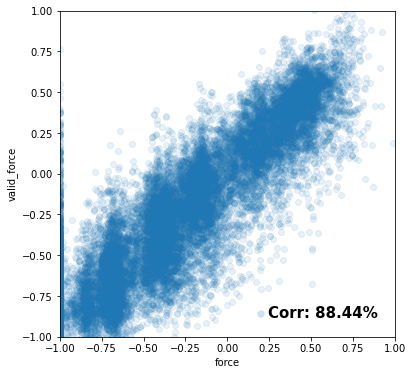

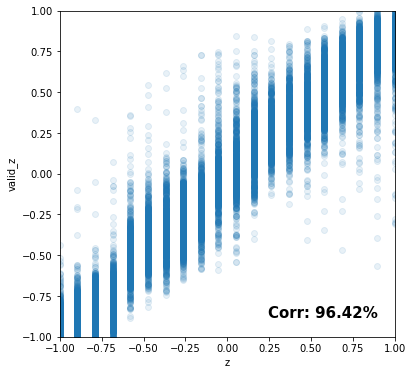

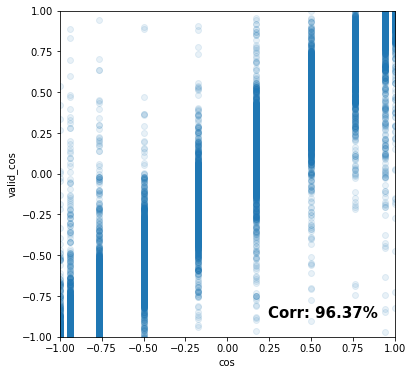

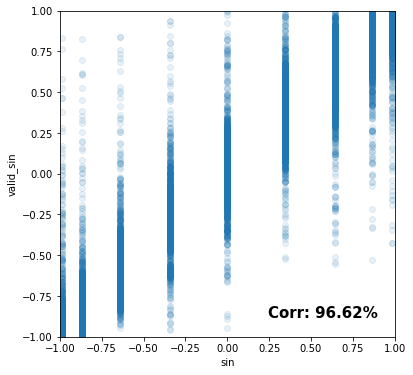

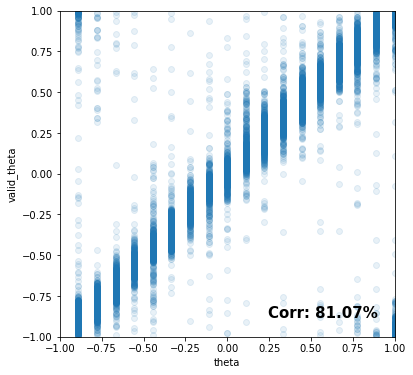

In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig/2line"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta']
#fields = ['force','z','r','cos','sin','theta']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


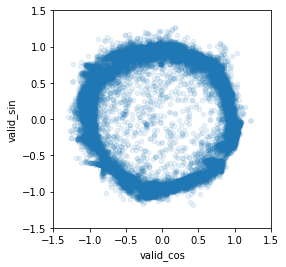

In [41]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

# Display the plot
plt.show()

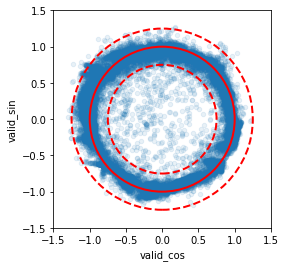

In [42]:
alpha = 0.1  # set alpha value for scatter plot
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# Draw a circle with center at (0, 0) and radius 1
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# Draw offset circles (one inside and one outside the main circle)
offset = 0.25  # adjust the offset value as needed
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=2)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=2)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
# Display the plot
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_offset.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()


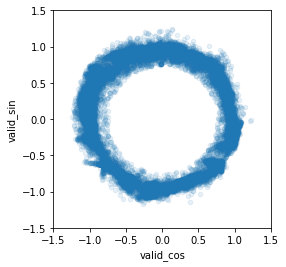

3.4712482468443198

In [43]:
ValidPre_filtered = ValidPre[
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 <= (1 + offset)**2) &
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 >= (1 - offset)**2)
]


ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()

total_data_count = len(ValidPre)
filtered_data_count = len(ValidPre_filtered)
percentage_filtered_out = ((total_data_count - filtered_data_count) / total_data_count) * 100
percentage_filtered_out

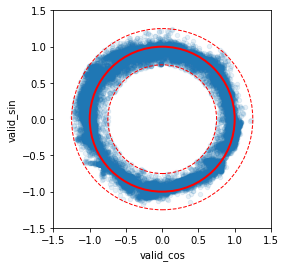

In [44]:
# 기존의 scatter plot을 그립니다.
ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# 중심이 (0, 0)이고 반지름이 1인 실선 원을 추가합니다.
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# 점선 원을 추가합니다. 하나는 내부에, 하나는 외부에 위치합니다.
offset = 0.25  # offset 값을 필요에 따라 조정합니다.
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=1)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=1)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# 그래프의 비율을 1:1로 설정합니다.
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정

# 그래프를 파일로 저장합니다.
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut_offset.png"))

# 그래프를 출력합니다.
plt.show()
